In [14]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [15]:
housing = pd.read_csv('housing_cleaned.csv')

In [16]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 49 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   MasVnrArea     1452 non-null   float64
 7   ExteriorQ      1460 non-null   int64  
 8   ExteriorC      1460 non-null   int64  
 9   BasementQ      1423 non-null   float64
 10  BasementC      1423 non-null   float64
 11  BasementEx     1422 non-null   float64
 12  Basement1      1423 non-null   float64
 13  BsmtFinSF1     1460 non-null   int64  
 14  Basement2      1422 non-null   float64
 15  BsmtFinSF2     1460 non-null   int64  
 16  BsmtUnfSF      1460 non-null   int64  
 17  TotalBsmtSF    1460 non-null   int64  
 18  Heating 

In [17]:
housing.head()

,Unnamed: 0,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,ExteriorQ,ExteriorC,BasementQ,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Pool,FenceType,MiscVal,SalePrice,HouseAge
0,0,65.0,8450,7,5,2003,196.0,4,3,4.0,...,61,0,0,0,0,0.0,0.0,0,208500,8
1,1,80.0,9600,6,8,1976,0.0,3,3,4.0,...,0,0,0,0,0,0.0,0.0,0,181500,35
2,2,68.0,11250,7,5,2001,162.0,4,3,4.0,...,42,0,0,0,0,0.0,0.0,0,223500,10
3,3,60.0,9550,7,5,1915,0.0,3,3,3.0,...,35,272,0,0,0,0.0,0.0,0,140000,96
4,4,84.0,14260,8,5,2000,350.0,4,3,4.0,...,84,0,0,0,0,0.0,0.0,0,250000,11


In [38]:
#scatter plots
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'SalePrice', data=housing, alpha=0.5)
        ax.set(xlabel=col, ylabel='Sale price')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

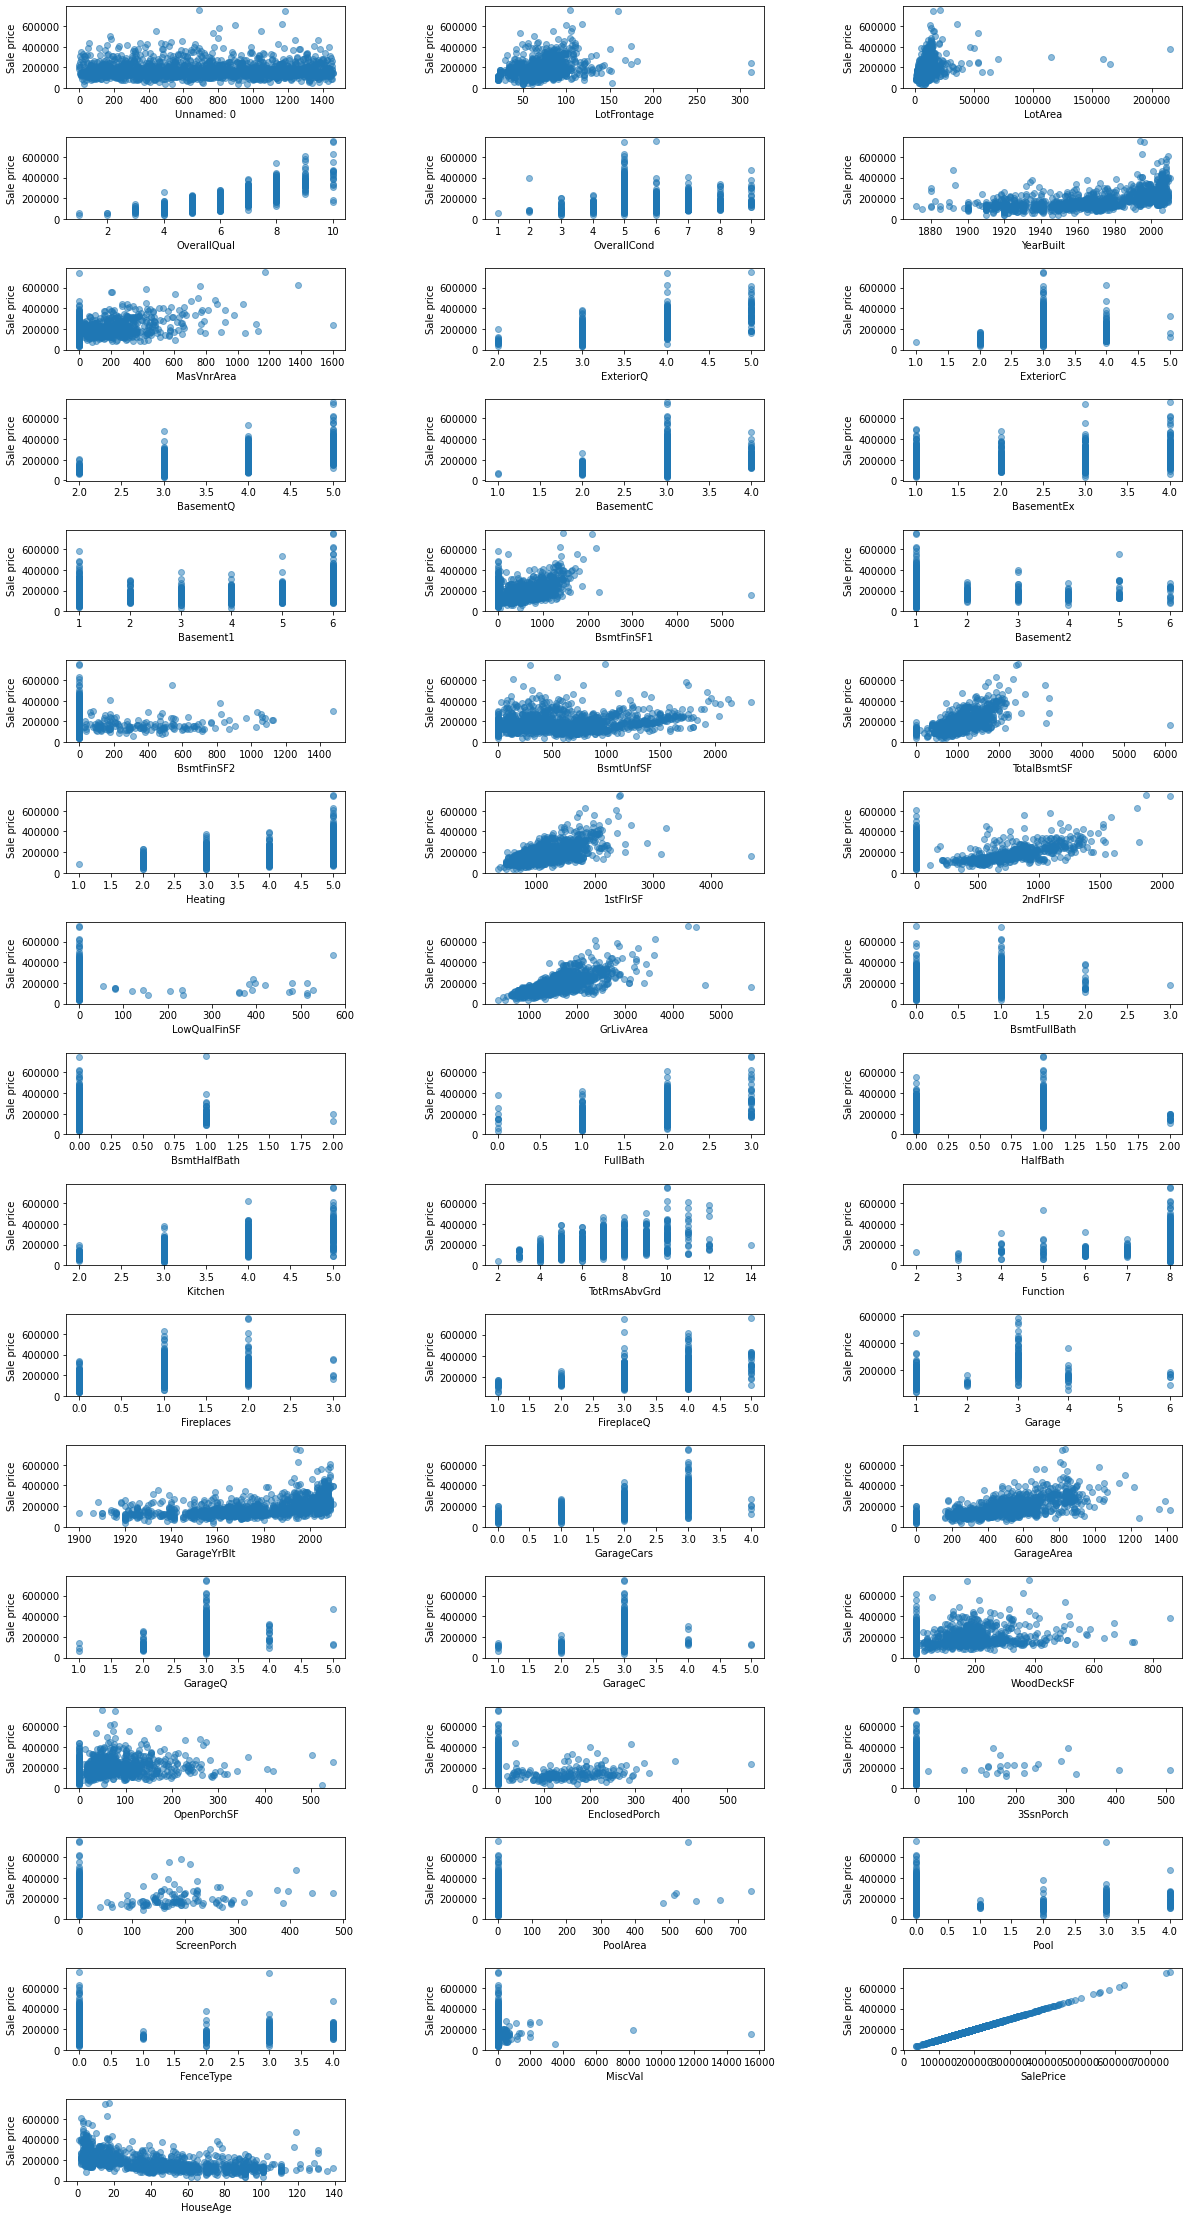

In [39]:
scatterplots(housing.columns, ncol=3, figsize=(20, 40))

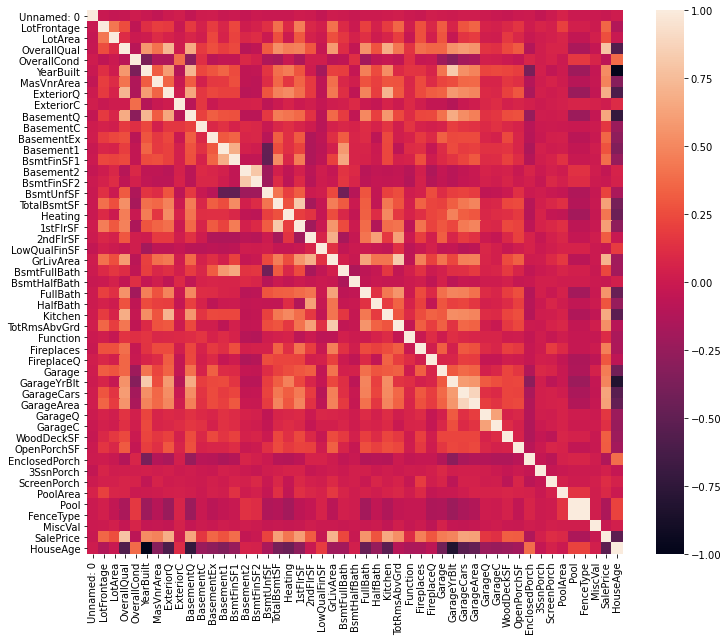

In [18]:
#correlation matrix (corr function)
plt.subplots(figsize=(12,10))
sns.heatmap(housing.corr());

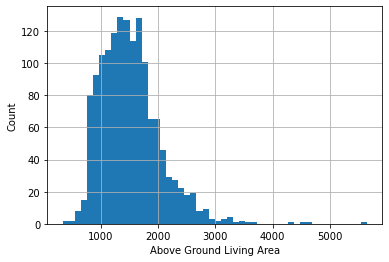

In [40]:
housing.GrLivArea.hist(bins=50)
plt.xlabel('Above Ground Living Area (sq ft)')
plt.ylabel('Count');

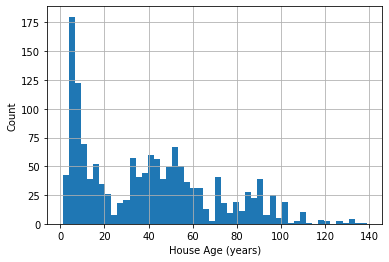

In [20]:
housing.HouseAge.hist(bins=50)
plt.xlabel('House Age (years)')
plt.ylabel('Count');

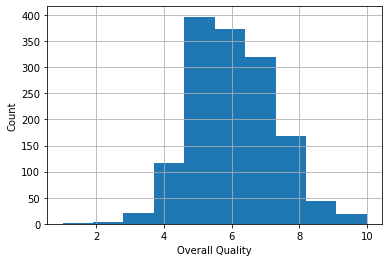

In [21]:
housing.OverallQual.hist(bins=10)
plt.xlabel('Overall Quality')
plt.ylabel('Count');

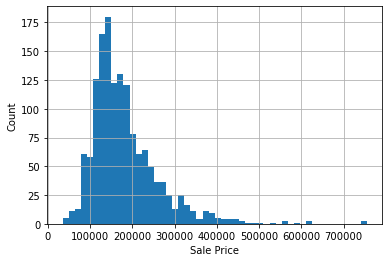

In [22]:
housing.SalePrice.hist(bins=50)
plt.xlabel('Sale Price ($)')
plt.ylabel('Count');

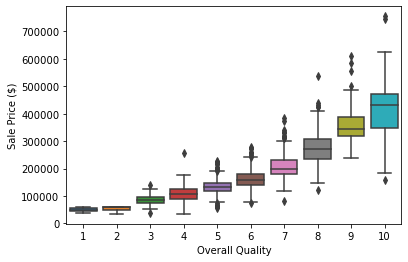

In [43]:
#box plots
_ = sns.boxplot(x='OverallQual', y='SalePrice', data=housing)
_ = plt.xlabel('Overall Quality')
_ = plt.ylabel('Sale Price ($)')

plt.show()

In [ ]:
#t-tests to compare means
